##### 良好的数据特征组合不需要太多既可以使得模型的性能表现突出，因此筛选出好的特征对于机器学习而言是非常重要的一步操作

##### 特征筛选与PCA这类通过选择主成分对特征进行重构的方法略有不同，对于PCA而言，我们无法解释重构之后的特征，但是特征筛选不存在对特征值的修改
##### 而是侧重于寻找那些对模型性能提升较大的少量特征。

#### 泰坦尼克号事件数据是一份比较久远的数据集，有很多的缺失数据，需要对缺失数据做处理。我们这节通过特征筛选的方法一步步提升决策树性能

In [21]:
import pandas as pd
df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [22]:
#查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


In [23]:
df.head(2)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female


In [24]:
Y = df['survived']
X = df.drop(['row.names','name','survived'],axis=1)

In [26]:
Y.head()

0    1
1    0
2    0
3    0
4    1
Name: survived, dtype: int64

In [29]:
X.head(50)

,pclass,age,embarked,home.dest,room,ticket,boat,sex
0,1st,29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,1st,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,1st,47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,1st,63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,1st,39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,1st,58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,1st,71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


In [30]:
#发现数据有NaN值，需要处理
X['age'].fillna(X['age'].mean(),inplace=True)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 8 columns):
pclass       1313 non-null object
age          1313 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), object(7)
memory usage: 82.1+ KB


In [32]:
#对于其他的类别信息的NaN值，填充为UNKNOWN
X.fillna('UNKNOWN',inplace=True)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 8 columns):
pclass       1313 non-null object
age          1313 non-null float64
embarked     1313 non-null object
home.dest    1313 non-null object
room         1313 non-null object
ticket       1313 non-null object
boat         1313 non-null object
sex          1313 non-null object
dtypes: float64(1), object(7)
memory usage: 82.1+ KB


In [34]:
X.head(10)

,pclass,age,embarked,home.dest,room,ticket,boat,sex
0,1st,29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,UNKNOWN,UNKNOWN,female
2,1st,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,UNKNOWN,(135),male
3,1st,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,UNKNOWN,UNKNOWN,female
4,1st,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,UNKNOWN,11,male
5,1st,47.0000,Southampton,"New York, NY",E-12,UNKNOWN,3,male
6,1st,63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,1st,39.0000,Southampton,"Belfast, NI",A-36,UNKNOWN,UNKNOWN,male
8,1st,58.0000,Southampton,"Bayside, Queens, NY",C-101,UNKNOWN,2,female
9,1st,71.0000,Cherbourg,"Montevideo, Uruguay",UNKNOWN,UNKNOWN,(22),male


### 分割数据

In [35]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=123)

### 类别特征向量化

In [36]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X_train = vec.fit_transform(x_train.to_dict(orient='record'))
X_test = vec.transform(x_test.to_dict(orient='record'))

In [37]:
#输出类别特征向量化之后的特征维度
vec.feature_names_

['age',
 'boat=(101)',
 'boat=(103)',
 'boat=(108)',
 'boat=(109)',
 'boat=(121)',
 'boat=(122)',
 'boat=(124)',
 'boat=(126)',
 'boat=(130)',
 'boat=(133)',
 'boat=(135)',
 'boat=(140)',
 'boat=(142)',
 'boat=(147)',
 'boat=(148)',
 'boat=(149)',
 'boat=(15)',
 'boat=(165)',
 'boat=(166)',
 'boat=(17)',
 'boat=(171)',
 'boat=(172)',
 'boat=(174)',
 'boat=(175)',
 'boat=(18)',
 'boat=(189)',
 'boat=(19)',
 'boat=(190)',
 'boat=(208)',
 'boat=(209)',
 'boat=(22)',
 'boat=(230)',
 'boat=(234)',
 'boat=(241)',
 'boat=(245)',
 'boat=(249)',
 'boat=(256)',
 'boat=(258)',
 'boat=(259)',
 'boat=(260)',
 'boat=(263)',
 'boat=(271)',
 'boat=(275)',
 'boat=(283)',
 'boat=(286)',
 'boat=(287)',
 'boat=(292)',
 'boat=(293)',
 'boat=(294)',
 'boat=(295)',
 'boat=(297)',
 'boat=(299)',
 'boat=(35)',
 'boat=(38)',
 'boat=(46)',
 'boat=(52)',
 'boat=(62)',
 'boat=(75)',
 'boat=(79)',
 'boat=(80)',
 'boat=(81)',
 'boat=(89)',
 'boat=(97)',
 'boat=1',
 'boat=10',
 'boat=11',
 'boat=12',
 'boat=13',
 'bo

In [38]:
len(vec.feature_names_)

487

### 使用特征向量化之后的所有487个特征，用决策树进行预测

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predict = dtc.predict(X_test)

In [40]:
dtc.score(X_test,y_test)

0.88753799392097266

In [18]:
#在不加如任何的特征筛选的情况下，性能在88%左右

### 使用特征筛选器，选择合适特征进行特征学习

In [42]:
from sklearn import feature_selection
#选取前60%的特征，再次学习
fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=60)
X_train_fs = fs.fit_transform(X_train,y_train)

dtc.fit(X_train_fs,y_train)

x_test_fs = fs.transform(X_test)


<class 'scipy.sparse.csr.csr_matrix'>


In [43]:
### 性能
dtc.score(x_test_fs,y_test)

0.88449848024316113

##### 看来选取不同的特征，会表现出不同的而性能，接下来我们通过交叉验证的方法，按照固定间隔的百分比筛选特征，并绘图显示特征选择的比例和性能的变化图

In [44]:
from sklearn.cross_validation import cross_val_score
import numpy as np

percentiles = np.linspace(1,100,100)
results = []

In [45]:
percentiles

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.])

In [46]:
for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    X_train_fs = fs.fit_transform(X_train,y_train)
    scores = cross_val_score(dtc,X_train_fs,y_train,cv=5)
    #print(scores)
    results = np.append(results,scores.mean())
print(results)




[ 0.81507628  0.83132548  0.86080357  0.85876793  0.86793084  0.87707318
  0.8678792   0.86891509  0.87602185  0.87400164  0.86889442  0.86993032
  0.8770422   0.87195047  0.87804712  0.86379244  0.87298129  0.86789991
  0.86892545  0.87197119  0.86788956  0.86890991  0.86992519  0.86892032
  0.85872142  0.85972629  0.8709456   0.86685377  0.87297098  0.86582812
  0.85974701  0.86382869  0.86687951  0.86685371  0.87095601  0.86993048
  0.86891525  0.86277731  0.86788966  0.85669614  0.87093017  0.86380798
  0.86891007  0.86788448  0.85973147  0.85667543  0.8628288   0.86994586
  0.85669086  0.86178788  0.86486454  0.86279275  0.86077767  0.85467594
  0.85873696  0.86281854  0.86078808  0.85874204  0.86383895  0.86280305
  0.86383377  0.8617827   0.85567563  0.86180844  0.864849    0.86281331
  0.85770614  0.86179295  0.86584879  0.86386992  0.86179301  0.86281331
  0.87605277  0.87501169  0.87500657  0.8658332   0.87196078  0.87705774
  0.87196596  0.87603733  0.86891509  0.87401708  0

In [47]:
#找到性能最佳的点
opt = np.where(results==results.max())[0]
print(opt)

[89]


In [49]:
#性能最佳点取到的百分数
percentiles[opt]

array([ 90.])

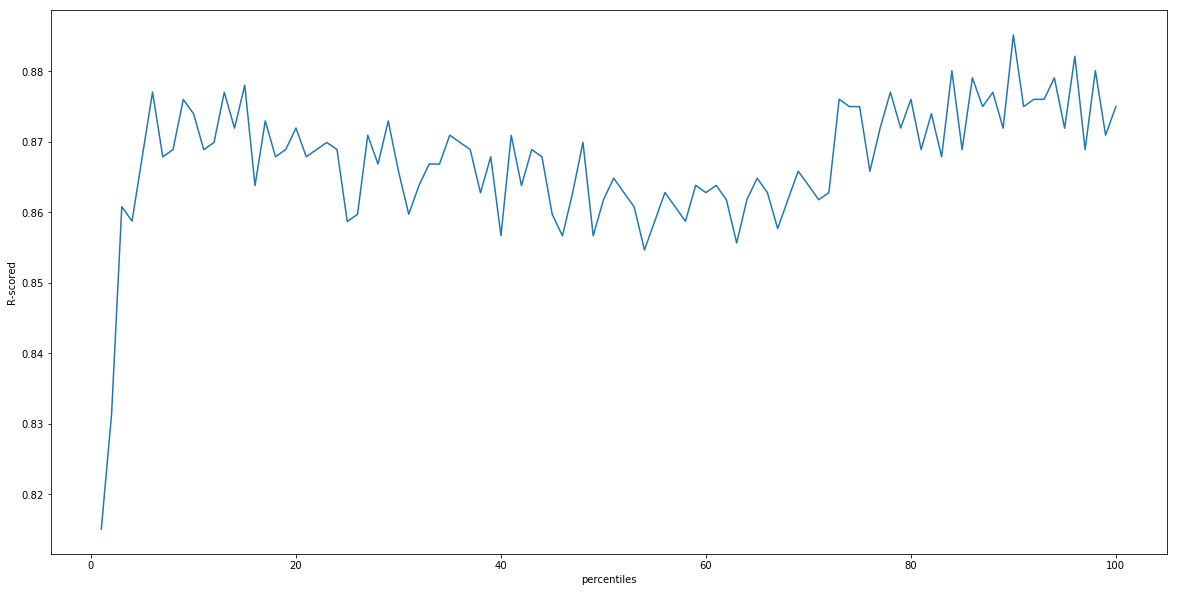

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(percentiles,results)
plt.xlabel('percentiles')
plt.ylabel('R-scored')
plt.show()